Olan Healy -- 21318204

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define path to where bank.csv is located
csv_path = '/content/drive/MyDrive/[04] College/[04] Year/SEM 2/CS4168/LAB 2/bank.csv'
df = pd.read_csv(csv_path)
# print head of dataset
print(df.head())

    age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no  


In [4]:
# Checking for missing values
df.isna().sum()

,0
age,12
job,10
marital,0
education,104
default,0
balance,0
housing,0
loan,0
contact,191
day,0


In [5]:
# Make a copy of dataset before transformation
df_original = df

# Process and Encode the Categorical Features

Encode Ordinal Categorical Attributes

In [7]:
# Scale mapper for education to convert to numerical values
scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

<ipython-input-7-74e85d7fbf60>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(scale_mapper)


In [8]:
# Scale mapper for months to convert to numerical values (0 for January through 11 for December).
scale_mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11
}

df['month'] = df['month'].replace(scale_mapper)

# Tail of dataset to see month numerical value
df.tail()

<ipython-input-8-f5f522ea3e55>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace(scale_mapper)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


One-Hot Encode All Other Categorical Attributes

In [9]:
# one hot encode categorical columns with NaNs
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,8,327,...,False,True,False,False,False,False,False,False,False,True
1996,28.0,single,1.0,no,127,no,no,16,8,1334,...,False,False,False,False,False,False,False,False,False,True
1997,81.0,married,0.0,no,1154,no,no,17,8,231,...,False,False,False,False,False,True,False,False,False,True
1998,46.0,married,0.0,no,4343,yes,no,20,8,185,...,True,False,False,False,False,False,True,False,False,True
1999,40.0,married,1.0,no,6403,no,no,22,8,208,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# one hot encode all other columns
df = pd.get_dummies(df, drop_first=True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,NaN,2785,16,8,327,2,-1,0,False,...,False,False,False,True,False,True,False,False,False,True
1996,28.0,1.0,127,16,8,1334,2,-1,0,False,...,False,False,False,True,False,True,False,False,False,True
1997,81.0,0.0,1154,17,8,231,1,-1,0,False,...,False,False,False,True,True,False,False,False,False,True
1998,46.0,0.0,4343,20,8,185,1,-1,0,False,...,True,False,False,True,True,False,False,True,False,True
1999,40.0,1.0,6403,22,8,208,2,-1,0,False,...,False,False,False,True,True,False,False,False,False,True


# Treatment of Missing Values in Numerical Columns

In [11]:
# Check for missing values
df.isna().sum()

,0
age,12
education,104
balance,0
day,0
month,0
duration,0
campaign,0
pdays,0
previous,0
job_blue-collar,0


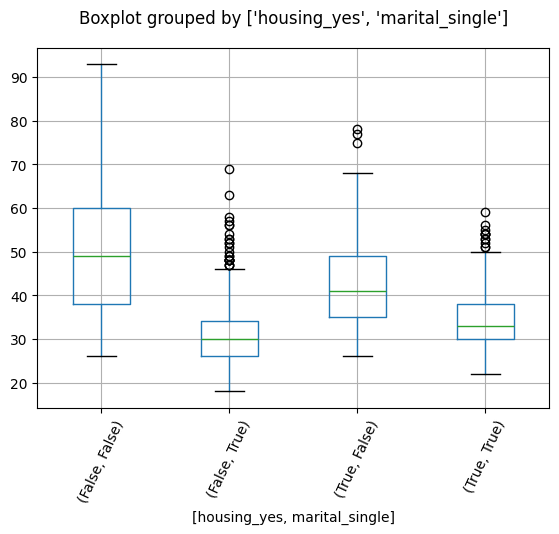

In [13]:
# boxplot for age column, grouped by the housing_yes and marital_single columns
df.boxplot(column='age', by=['housing_yes','marital_single'], rot=65)
plt.title("")
plt.show()

In [14]:
# pivot table that computes the median age which then can use to put  in for missing values
ptable = df.pivot_table(values='age',
                        index='marital_single',
                        columns='housing_yes',
                        aggfunc=np.median)
ptable

<ipython-input-14-14a8ffccfdef>:1: FutureWarning: The provided callable <function median at 0x7d8bc6fab100> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ptable = df.pivot_table(values='age',


housing_yes,False,True
marital_single,,
False,49.0,41.0
True,30.0,33.0


In [15]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_single'], x['housing_yes']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

<ipython-input-15-6227067b443e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)


In [16]:
df['education'].fillna(df['education'].median(), inplace=True)

<ipython-input-16-b343a3ac1332>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].median(), inplace=True)


# Rescaling Features

In [17]:
robust_scaler = RobustScaler()
df[['previous', 'campaign']] = robust_scaler.fit_transform(df[['previous', 'campaign']])

In [18]:
df['education'] = df['education']/3

# Treatment of Outliers

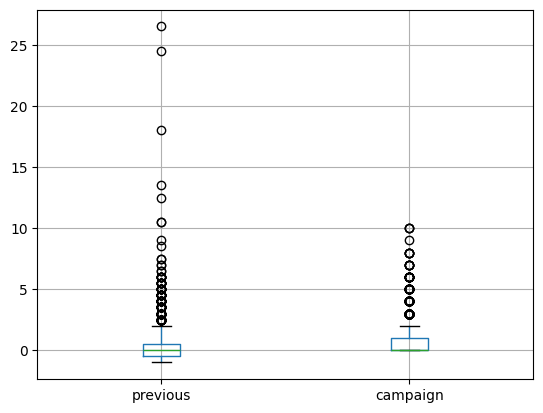

In [19]:
df.boxplot(column=['previous','campaign'])
plt.show()

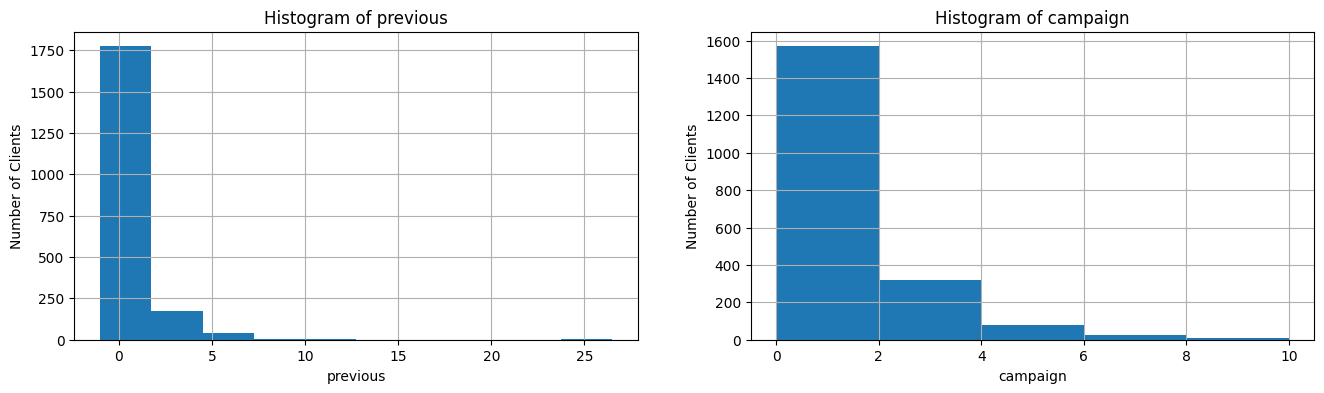

In [20]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot previous
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of previous")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Clients')
df['previous'].hist(bins=10)

# Plot campaign
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Clients')
df['campaign'].hist(bins=5)

plt.show()

In [21]:
df[['previous', 'campaign']].min()

,0
previous,-1.0
campaign,0.0


In [22]:
# Use a log transformation to decrease the impact of outliers
df['previous'] = np.log(df['previous'] + abs(min(df['previous'])) + 1)
df['campaign'] = np.log(df['campaign'] + abs(min(df['campaign'])) + 1)

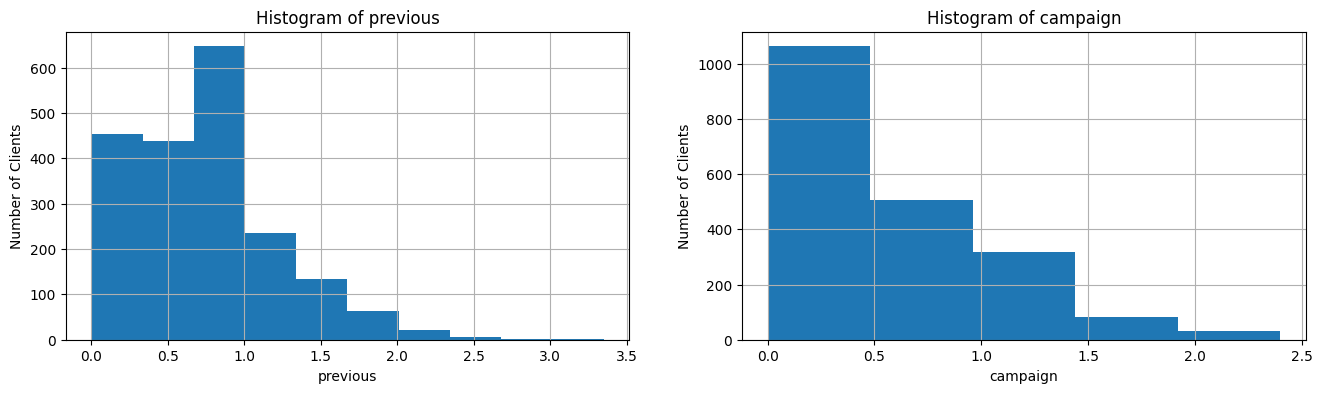

In [23]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot previous
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of previous")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Clients')
df['previous'].hist(bins=10)

# Plot campaign
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Clients')
df['campaign'].hist(bins=5)

plt.show()

In [24]:
df['total_contact'] = df_original['campaign'] + df_original['previous']
df[['total_contact']] = robust_scaler.fit_transform(df[['total_contact']])
df[['total_contact']].min()

,0
total_contact,-0.666667


In [ ]:
df['total_contact'] = np.log(df['total_contact']+2.19)

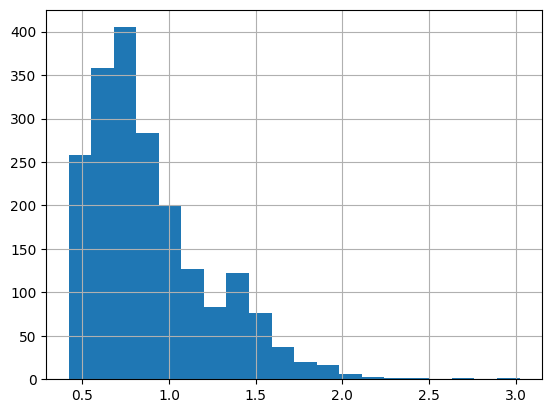

In [ ]:
df['total_contact'].hist(bins=20)
plt.show()

In [ ]:
df.to_csv(r"C:\Users\olan\olan[01] College\YRA\CS4168\bank_train_prepared.csv")
